In [18]:
import pkg_resources
import pickle

from airsenal.framework.prediction_utils import get_all_fitted_player_models, fit_player_data
from airsenal.framework.utils import get_player_name, NEXT_GAMEWEEK
from airsenal.framework.season import CURRENT_SEASON
from airsenal.framework.schema import session

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
model_file = pkg_resources.resource_filename(
    "airsenal", "stan_model/player_forecasts.pkl"
)
print(f"Loading pre-compiled player model from {model_file}")
with open(model_file, "rb") as f:
    model = pickle.load(f)


Loading pre-compiled player model from /Users/jroberts/GitHub/AIrsenal/airsenal/stan_model/player_forecasts.pkl


## FWD

In [22]:
df_fwd, fit, data = fit_player_data(model, 'FWD', CURRENT_SEASON, NEXT_GAMEWEEK-1, session)

Filling history dataframe for Harry Kane: 0/61 done
Filling history dataframe for Jamie Vardy: 1/61 done
Filling history dataframe for Pierre-Emerick Aubameyang: 2/61 done
Filling history dataframe for Timo Werner: 3/61 done
Filling history dataframe for Roberto Firmino: 4/61 done
Filling history dataframe for Alexandre Lacazette: 5/61 done
Filling history dataframe for Gabriel Fernando de Jesus: 6/61 done
Filling history dataframe for Edinson Cavani: 7/61 done
Filling history dataframe for Dominic Calvert-Lewin: 8/61 done
Filling history dataframe for Patrick Bamford: 9/61 done
Filling history dataframe for Anthony Martial: 10/61 done
Filling history dataframe for Danny Ings: 11/61 done
Filling history dataframe for Ollie Watkins: 12/61 done
Filling history dataframe for Richarlison de Andrade: 13/61 done
Filling history dataframe for Kelechi Iheanacho: 14/61 done
Filling history dataframe for Patson Daka: 15/61 done
Filling history dataframe for Callum Wilson: 16/61 done
Filling hist

In [23]:
df_fwd['name'] = [get_player_name(idx) for idx in df_fwd.index]
df_fwd = df_fwd[['name', 'pr_score', 'pr_assist', 'pr_neither', 'pos']] # reorder cols

In [24]:
df_fwd.sort_values(by='pr_score', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
364,Danny Ings,0.359032,0.112230,0.528738,FWD
116,Chris Wood,0.342919,0.104682,0.552399,FWD
4,Pierre-Emerick Aubameyang,0.341717,0.115280,0.543004,FWD
385,Harry Kane,0.333154,0.135293,0.531553,FWD
201,Jamie Vardy,0.323718,0.150909,0.525373,FWD
337,Teemu Pukki,0.322195,0.131685,0.546119,FWD
188,Dominic Calvert-Lewin,0.319525,0.126223,0.554251,FWD
464,Raúl Jiménez,0.313947,0.158566,0.527487,FWD
112,Ashley Barnes,0.305049,0.097060,0.597891,FWD


In [25]:
df_fwd.sort_values(by='pr_score', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
247,Roberto Firmino,0.191856,0.128874,0.679270,FWD
330,Joelinton Cássio Apolinário de Lira,0.220443,0.112374,0.667183,FWD
143,Timo Werner,0.223533,0.173320,0.603147,FWD
327,Allan Saint-Maximin,0.223936,0.158790,0.617275,FWD
161,Jordan Ayew,0.233665,0.142082,0.624252,FWD
282,Gabriel Fernando de Jesus,0.235348,0.118952,0.645699,FWD
98,Aaron Connolly,0.260817,0.137526,0.601657,FWD
372,Che Adams,0.261067,0.157212,0.581721,FWD
421,Isaac Success Ajayi,0.262438,0.129059,0.608503,FWD


In [26]:
df_fwd.sort_values(by='pr_assist', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
316,Callum Wilson,0.296619,0.180431,0.522950,FWD
143,Timo Werner,0.223533,0.173320,0.603147,FWD
6,Alexandre Lacazette,0.294949,0.163639,0.541412,FWD
227,Patrick Bamford,0.299116,0.162618,0.538266,FWD
327,Allan Saint-Maximin,0.223936,0.158790,0.617275,FWD
447,Michail Antonio,0.280603,0.158731,0.560667,FWD
464,Raúl Jiménez,0.313947,0.158566,0.527487,FWD
372,Che Adams,0.261067,0.157212,0.581721,FWD
209,Kelechi Iheanacho,0.294631,0.156383,0.548986,FWD


In [27]:
df_fwd.sort_values(by='pr_assist', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
112,Ashley Barnes,0.305049,0.097060,0.597891,FWD
116,Chris Wood,0.342919,0.104682,0.552399,FWD
89,Neal Maupay,0.287802,0.111767,0.600431,FWD
364,Danny Ings,0.359032,0.112230,0.528738,FWD
330,Joelinton Cássio Apolinário de Lira,0.220443,0.112374,0.667183,FWD
49,Wesley Moraes,0.265956,0.112833,0.621211,FWD
4,Pierre-Emerick Aubameyang,0.341717,0.115280,0.543004,FWD
282,Gabriel Fernando de Jesus,0.235348,0.118952,0.645699,FWD
20,Edward Nketiah,0.284364,0.120649,0.594987,FWD


In [28]:
df_fwd.sort_values(by='pr_neither', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
316,Callum Wilson,0.296619,0.180431,0.522950,FWD
201,Jamie Vardy,0.323718,0.150909,0.525373,FWD
464,Raúl Jiménez,0.313947,0.158566,0.527487,FWD
364,Danny Ings,0.359032,0.112230,0.528738,FWD
385,Harry Kane,0.333154,0.135293,0.531553,FWD
227,Patrick Bamford,0.299116,0.162618,0.538266,FWD
6,Alexandre Lacazette,0.294949,0.163639,0.541412,FWD
4,Pierre-Emerick Aubameyang,0.341717,0.115280,0.543004,FWD
337,Teemu Pukki,0.322195,0.131685,0.546119,FWD


In [29]:
df_fwd.sort_values(by='pr_neither', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
247,Roberto Firmino,0.191856,0.128874,0.679270,FWD
330,Joelinton Cássio Apolinário de Lira,0.220443,0.112374,0.667183,FWD
282,Gabriel Fernando de Jesus,0.235348,0.118952,0.645699,FWD
161,Jordan Ayew,0.233665,0.142082,0.624252,FWD
49,Wesley Moraes,0.265956,0.112833,0.621211,FWD
327,Allan Saint-Maximin,0.223936,0.158790,0.617275,FWD
437,Joshua King,0.266320,0.122377,0.611303,FWD
421,Isaac Success Ajayi,0.262438,0.129059,0.608503,FWD
143,Timo Werner,0.223533,0.173320,0.603147,FWD


## MID

In [30]:
df_mid, fit, data = fit_player_data(model, 'MID', CURRENT_SEASON, NEXT_GAMEWEEK-1, session)

Filling history dataframe for Mohamed Salah: 0/203 done
Filling history dataframe for Sadio Mané: 1/203 done
Filling history dataframe for Kevin De Bruyne: 2/203 done
Filling history dataframe for Bruno Miguel Borges Fernandes: 3/203 done
Filling history dataframe for Raheem Sterling: 4/203 done
Filling history dataframe for Heung-Min Son: 5/203 done
Filling history dataframe for Marcus Rashford: 6/203 done
Filling history dataframe for Riyad Mahrez: 7/203 done
Filling history dataframe for Kai Havertz: 8/203 done
Filling history dataframe for Jack Grealish: 9/203 done
Filling history dataframe for Christian Pulisic: 10/203 done
Filling history dataframe for Phil Foden: 11/203 done
Filling history dataframe for Nicolas Pépé: 12/203 done
Filling history dataframe for Hakim Ziyech: 13/203 done
Filling history dataframe for Mason Mount: 14/203 done
Filling history dataframe for Diogo Jota: 15/203 done
Filling history dataframe for Ilkay Gündogan: 16/203 done
Filling history dataframe for 

Filling history dataframe for Owen Otasowie: 202/203 done
Alpha is [ 9.43201388  9.28194206 67.63263496]
Fitting player model for MID ...


In [31]:
df_mid['name'] = [get_player_name(idx) for idx in df_mid.index]
df_mid = df_mid[['name', 'pr_score', 'pr_assist', 'pr_neither', 'pos']] # reorder cols

In [32]:
df_mid.sort_values(by='pr_score', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
252,Mohamed Salah,0.238120,0.121020,0.640860,MID
249,Sadio Mané,0.211876,0.115101,0.673022,MID
387,Heung-Min Son,0.207438,0.172554,0.620008,MID
296,Bruno Miguel Borges Fernandes,0.192436,0.169236,0.638328,MID
259,Diogo Jota,0.191694,0.110563,0.697744,MID
300,Marcus Rashford,0.191514,0.141401,0.667085,MID
274,Raheem Sterling,0.191291,0.132078,0.676631,MID
162,Wilfried Zaha,0.168096,0.147226,0.684678,MID
44,Anwar El Ghazi,0.164915,0.097638,0.737447,MID


In [33]:
df_mid.sort_values(by='pr_score', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
287,Fernando Luiz Rosa,0.038401,0.058141,0.903458,MID
251,Fabio Henrique Tavares,0.047240,0.063146,0.889614,MID
290,Nemanja Matic,0.050577,0.060496,0.888927,MID
382,Moussa Sissoko,0.052200,0.061453,0.886347,MID
134,Mateo Kovacic,0.052302,0.079188,0.868510,MID
394,Harry Winks,0.052773,0.046336,0.900891,MID
108,Jack Cork,0.054120,0.058998,0.886882,MID
293,Frederico Rodrigues de Paula Santos,0.054446,0.053661,0.891894,MID
212,Wilfred Ndidi,0.056384,0.055754,0.887862,MID


In [34]:
df_mid.sort_values(by='pr_assist', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
270,Kevin De Bruyne,0.121882,0.191652,0.686467,MID
318,Ryan Fraser,0.097718,0.186033,0.716249,MID
387,Heung-Min Son,0.207438,0.172554,0.620008,MID
296,Bruno Miguel Borges Fernandes,0.192436,0.169236,0.638328,MID
35,Jack Grealish,0.138291,0.168190,0.693519,MID
81,Pascal Groß,0.106993,0.158110,0.734897,MID
3,Willian Borges Da Silva,0.107320,0.156639,0.736041,MID
475,Pedro Lomba Neto,0.128814,0.151159,0.720027,MID
273,Riyad Mahrez,0.153614,0.148628,0.697758,MID


In [35]:
df_mid.sort_values(by='pr_assist', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
394,Harry Winks,0.052773,0.046336,0.900891,MID
293,Frederico Rodrigues de Paula Santos,0.054446,0.053661,0.891894,MID
285,Rodrigo Hernandez,0.060728,0.055528,0.883743,MID
212,Wilfred Ndidi,0.056384,0.055754,0.887862,MID
362,Oriol Romeu Vidal,0.063689,0.056670,0.879641,MID
96,Yves Bissouma,0.072101,0.057239,0.870661,MID
468,Leander Dendoncker,0.086584,0.057696,0.855719,MID
287,Fernando Luiz Rosa,0.038401,0.058141,0.903458,MID
108,Jack Cork,0.054120,0.058998,0.886882,MID


In [36]:
df_mid.sort_values(by='pr_neither', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
387,Heung-Min Son,0.207438,0.172554,0.620008,MID
296,Bruno Miguel Borges Fernandes,0.192436,0.169236,0.638328,MID
252,Mohamed Salah,0.238120,0.121020,0.640860,MID
300,Marcus Rashford,0.191514,0.141401,0.667085,MID
249,Sadio Mané,0.211876,0.115101,0.673022,MID
274,Raheem Sterling,0.191291,0.132078,0.676631,MID
162,Wilfried Zaha,0.168096,0.147226,0.684678,MID
270,Kevin De Bruyne,0.121882,0.191652,0.686467,MID
35,Jack Grealish,0.138291,0.168190,0.693519,MID


In [37]:
df_mid.sort_values(by='pr_neither', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
287,Fernando Luiz Rosa,0.038401,0.058141,0.903458,MID
394,Harry Winks,0.052773,0.046336,0.900891,MID
293,Frederico Rodrigues de Paula Santos,0.054446,0.053661,0.891894,MID
251,Fabio Henrique Tavares,0.047240,0.063146,0.889614,MID
290,Nemanja Matic,0.050577,0.060496,0.888927,MID
212,Wilfred Ndidi,0.056384,0.055754,0.887862,MID
108,Jack Cork,0.054120,0.058998,0.886882,MID
382,Moussa Sissoko,0.052200,0.061453,0.886347,MID
285,Rodrigo Hernandez,0.060728,0.055528,0.883743,MID


## DEF

In [38]:
df_def, fit, data = fit_player_data(model, 'DEF', CURRENT_SEASON, NEXT_GAMEWEEK-1, session)

Filling history dataframe for Trent Alexander-Arnold: 0/170 done
Filling history dataframe for Andrew Robertson: 1/170 done
Filling history dataframe for Virgil van Dijk: 2/170 done
Filling history dataframe for César Azpilicueta: 3/170 done
Filling history dataframe for Benjamin Chilwell: 4/170 done
Filling history dataframe for João Pedro Cavaco Cancelo: 5/170 done
Filling history dataframe for Rúben Santos Gato Alves Dias: 6/170 done
Filling history dataframe for Thiago Thiago: 7/170 done
Filling history dataframe for Marcos Alonso: 8/170 done
Filling history dataframe for Antonio Rüdiger: 9/170 done
Filling history dataframe for Kurt Zouma: 10/170 done
Filling history dataframe for Reece James: 11/170 done
Filling history dataframe for Lucas Digne: 12/170 done
Filling history dataframe for Jonny Evans: 13/170 done
Filling history dataframe for Ricardo Domingos Barbosa Pereira: 14/170 done
Filling history dataframe for Timothy Castagne: 15/170 done
Filling history dataframe for Ibra

Alpha is [ 2.70836805  4.65729505 81.24123345]
Fitting player model for DEF ...


In [39]:
df_def['name'] = [get_player_name(idx) for idx in df_def.index]
df_def = df_def[['name', 'pr_score', 'pr_assist', 'pr_neither', 'pos']] # reorder cols

In [40]:
df_def.sort_values(by='pr_score', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
85,Lewis Dunk,0.061888,0.040472,0.897640,DEF
325,Fabian Schär,0.060891,0.039564,0.899545,DEF
313,Ciaran Clark,0.059939,0.028441,0.911620,DEF
82,Shane Duffy,0.059147,0.043417,0.897436,DEF
131,Marcos Alonso,0.050402,0.086479,0.863119,DEF
465,Romain Saïss,0.050282,0.032668,0.917050,DEF
388,Matt Doherty,0.048713,0.103650,0.847637,DEF
277,Nathan Aké,0.045813,0.035024,0.919163,DEF
448,Craig Dawson,0.045539,0.024828,0.929634,DEF


In [41]:
df_def.sort_values(by='pr_score', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
283,Oleksandr Zinchenko,0.008941,0.034841,0.956219,DEF
120,Charlie Taylor,0.009841,0.044121,0.946038,DEF
257,Joseph Gomez,0.009905,0.021205,0.968890,DEF
267,Ben Davies,0.010207,0.033812,0.955981,DEF
142,Andreas Christensen,0.010533,0.022556,0.966911,DEF
369,Kyle Walker-Peters,0.010880,0.067887,0.921233,DEF
14,Rob Holding,0.011009,0.030017,0.958974,DEF
11,Sead Kolasinac,0.011095,0.082181,0.906725,DEF
451,Arthur Masuaku,0.011558,0.058582,0.929860,DEF


In [42]:
df_def.sort_values(by='pr_assist', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
256,Trent Alexander-Arnold,0.029794,0.135685,0.834522,DEF
179,Lucas Digne,0.027422,0.123243,0.849335,DEF
253,Andrew Robertson,0.015044,0.113920,0.871036,DEF
312,Matt Ritchie,0.036129,0.111742,0.852129,DEF
388,Matt Doherty,0.048713,0.103650,0.847637,DEF
107,Erik Pieters,0.013847,0.094482,0.891671,DEF
396,Ryan Sessegnon,0.032572,0.093605,0.873824,DEF
452,Vladimir Coufal,0.011984,0.088802,0.899213,DEF
131,Marcos Alonso,0.050402,0.086479,0.863119,DEF


In [43]:
df_def.sort_values(by='pr_assist', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
271,John Stones,0.026001,0.016658,0.957340,DEF
463,Conor Coady,0.012429,0.016777,0.970794,DEF
257,Joseph Gomez,0.009905,0.021205,0.968890,DEF
303,Victor Lindelöf,0.018473,0.022200,0.959327,DEF
142,Andreas Christensen,0.010533,0.022556,0.966911,DEF
407,Craig Cathcart,0.029462,0.022884,0.947653,DEF
458,Issa Diop,0.039057,0.023599,0.937344,DEF
213,Çaglar Söyüncü,0.018794,0.023604,0.957602,DEF
383,Toby Alderweireld,0.019723,0.023701,0.956576,DEF


In [44]:
df_def.sort_values(by='pr_neither', ascending=True).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
256,Trent Alexander-Arnold,0.029794,0.135685,0.834522,DEF
388,Matt Doherty,0.048713,0.103650,0.847637,DEF
179,Lucas Digne,0.027422,0.123243,0.849335,DEF
312,Matt Ritchie,0.036129,0.111742,0.852129,DEF
131,Marcos Alonso,0.050402,0.086479,0.863119,DEF
253,Andrew Robertson,0.015044,0.113920,0.871036,DEF
396,Ryan Sessegnon,0.032572,0.093605,0.873824,DEF
144,Benjamin Chilwell,0.034946,0.080053,0.885002,DEF
386,Serge Aurier,0.025933,0.086231,0.887837,DEF


In [45]:
df_def.sort_values(by='pr_neither', ascending=False).head(10)

,name,pr_score,pr_assist,pr_neither,pos
player_id,,,,,
463,Conor Coady,0.012429,0.016777,0.970794,DEF
257,Joseph Gomez,0.009905,0.021205,0.968890,DEF
142,Andreas Christensen,0.010533,0.022556,0.966911,DEF
223,Luke Ayling,0.011573,0.024778,0.963649,DEF
303,Victor Lindelöf,0.018473,0.022200,0.959327,DEF
14,Rob Holding,0.011009,0.030017,0.958974,DEF
213,Çaglar Söyüncü,0.018794,0.023604,0.957602,DEF
271,John Stones,0.026001,0.016658,0.957340,DEF
93,Ben White,0.013651,0.029228,0.957121,DEF


## Compare

Text(0, 0.5, 'P(assist)')

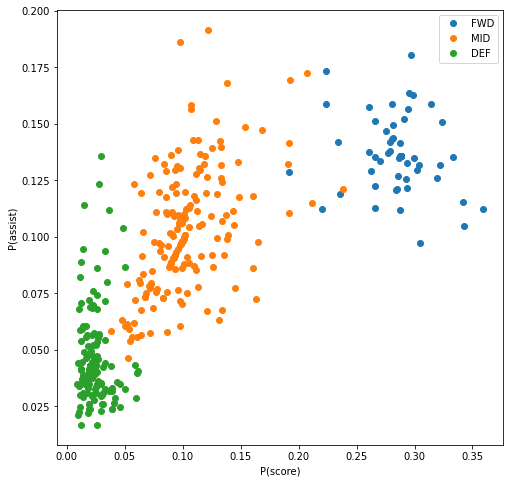

In [46]:
plt.figure(figsize=(8,8))
plt.plot(df_fwd['pr_score'], df_fwd['pr_assist'], 'o', label='FWD')
plt.plot(df_mid['pr_score'], df_mid['pr_assist'], 'o', label='MID')
plt.plot(df_def['pr_score'], df_def['pr_assist'], 'o', label='DEF')
plt.legend()
plt.xlabel('P(score)')
plt.ylabel('P(assist)')

/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

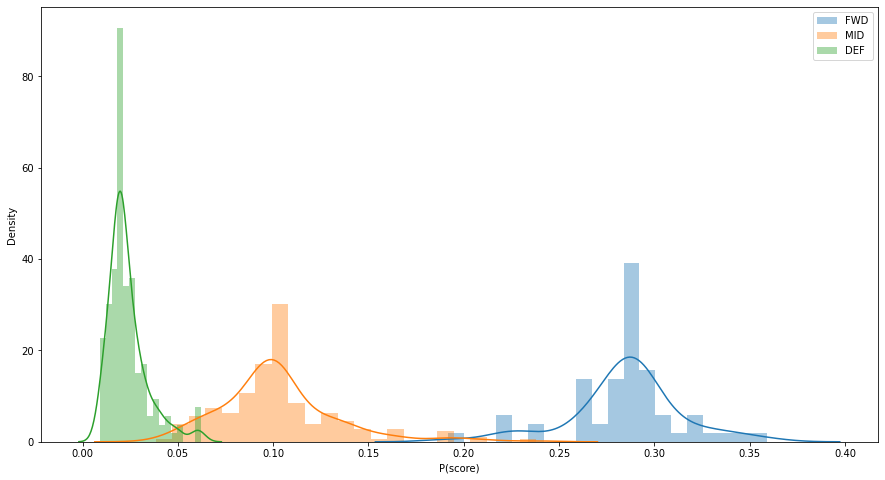

In [47]:
plt.figure(figsize=(15,8))
sns.distplot(df_fwd['pr_score'], label='FWD')
sns.distplot(df_mid['pr_score'], label='MID')
sns.distplot(df_def['pr_score'], label='DEF')
plt.xlabel('P(score)')
plt.legend()

/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

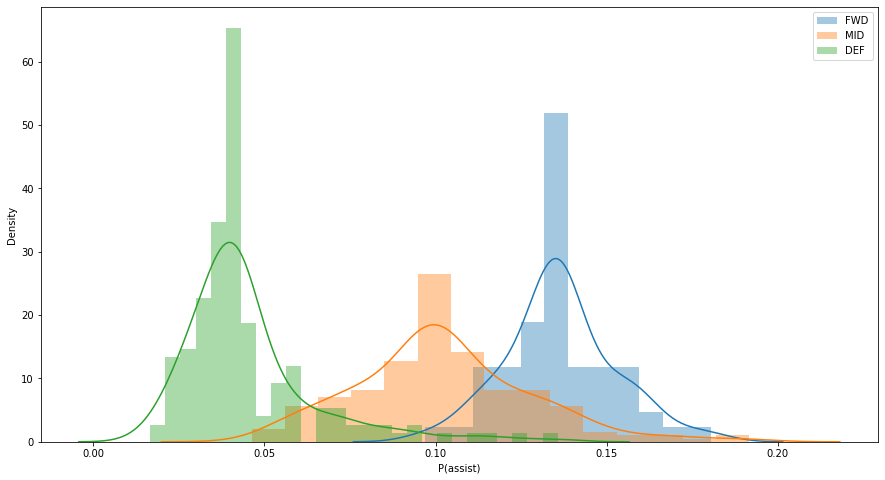

In [48]:
plt.figure(figsize=(15,8))
sns.distplot(df_fwd['pr_assist'], label='FWD')
sns.distplot(df_mid['pr_assist'], label='MID')
sns.distplot(df_def['pr_assist'], label='DEF')
plt.xlabel('P(assist)')
plt.legend()

/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/jroberts/opt/anaconda3/envs/airsenalenv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

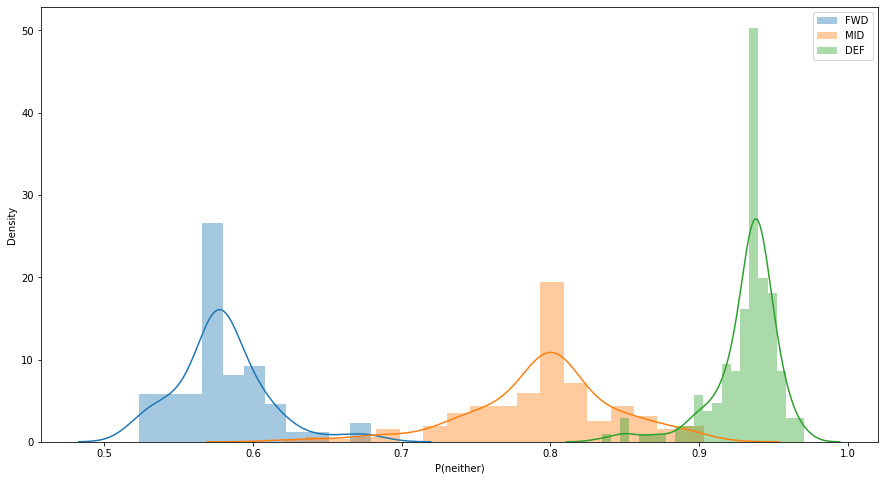

In [49]:
plt.figure(figsize=(15,8))
sns.distplot(df_fwd['pr_neither'], label='FWD')
sns.distplot(df_mid['pr_neither'], label='MID')
sns.distplot(df_def['pr_neither'], label='DEF')
plt.xlabel('P(neither)')
plt.legend()